**Predicción de Subida de Precio en Criptomonedas Usando Machine Learning (Bitcoin como Caso de Estudio)**

Este proyecto tuvo como objetivo construir un modelo de clasificación capaz de predecir si el precio de una criptomoneda aumentará o disminuirá en un horizonte de 24 horas, utilizando datos de mercado en tiempo real provenientes de la API de CoinGecko. Se utilizó como caso principal el comportamiento del Bitcoin, aunque los datos incluían las 100 criptomonedas principales por capitalización de mercado.

Se recopilaron datos como precio actual, capitalización de mercado, volumen total transado, ranking de mercado y cambio porcentual desde el máximo histórico (ATH). A partir de esta información, se generó una variable objetivo (sube) que toma valor 1 si el precio de la criptomoneda subió en las últimas 24 horas y 0 en caso contrario, planteando así un problema de clasificación binaria.

Se entrenaron dos modelos principales: un árbol de decisión con profundidad limitada y un random forest con 100 estimadores. Ambos modelos alcanzaron una precisión del 95% en el conjunto de prueba. Además, la validación cruzada mostró una precisión promedio del 93%, lo que indica buena capacidad de generalización. El análisis de importancia de variables reveló que la capitalización de mercado y el volumen transado fueron los factores más influyentes. Este enfoque puede aplicarse en escenarios reales como sistemas de alerta temprana o estrategias de trading algorítmico para detectar movimientos positivos en el mercado con base en señales estructurales.



In [5]:
import requests
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/markets"

params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False,
    "price_change_percentage": "24h"
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data)
df.head()



,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_24h_in_currency
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,106965.00,2126792399443,1,2126792399443,2.963495e+10,108116.000,...,2.100000e+07,111814.00,-4.34581,2025-05-22T18:41:28.492Z,67.810000,1.576297e+05,2013-07-06T00:00:00.000Z,None,2025-06-26T14:01:35.943Z,-0.944273
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2431.98,293544263747,2,293544263747,1.776030e+10,2510.280,...,NaN,4878.26,-50.14743,2021-11-10T14:24:19.604Z,0.432979,5.615760e+05,2015-10-20T00:00:00.000Z,"{'times': 29.3884717820872, 'currency': 'btc',...",2025-06-26T14:01:36.952Z,-0.151714
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,157252791478,3,157252791478,4.610860e+10,1.001,...,NaN,1.32,-24.40398,2018-07-24T00:00:00.000Z,0.572521,7.470230e+01,2015-03-02T00:00:00.000Z,None,2025-06-26T14:01:42.593Z,-0.031927
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.13,125867171428,4,213284252370,2.479318e+09,2.230,...,1.000000e+11,3.40,-37.40884,2018-01-07T00:00:00.000Z,0.002686,7.908710e+04,2014-05-22T00:00:00.000Z,None,2025-06-26T14:01:40.514Z,-4.398840
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,642.46,93831440154,5,93831440154,6.424703e+08,649.460,...,2.000000e+08,788.84,-18.55758,2024-12-04T10:35:25.220Z,0.039818,1.613387e+06,2017-10-19T00:00:00.000Z,None,2025-06-26T14:01:35.414Z,-0.736977


In [6]:
df["sube"] = df["price_change_percentage_24h_in_currency"].apply(lambda x: 1 if x > 0 else 0)


In [7]:
features = [
    "current_price",
    "market_cap",
    "total_volume",
    "market_cap_rank",
    "ath_change_percentage"
]
X = df[features]
y = df["sube"]


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))


Precisión: 0.95


In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Accuracy promedio:", scores.mean())


Accuracy promedio: 0.93


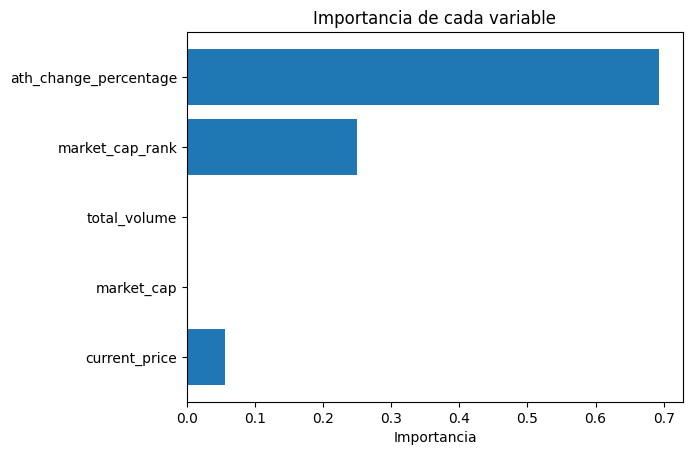

In [10]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.xlabel("Importancia")
plt.title("Importancia de cada variable")
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Precisión RF:", accuracy_score(y_test, y_pred_rf))


Precisión RF: 0.95


In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
params = {
    "vs_currency": "usd",
    "days": "30",  # últimos 30 días
    "interval": "daily"
}

response = requests.get(url, params=params)
data = response.json()


In [13]:
prices = data["prices"]  # lista de [timestamp, price]
df_price = pd.DataFrame(prices, columns=["timestamp", "price"])
df_price["date"] = pd.to_datetime(df_price["timestamp"], unit="ms")


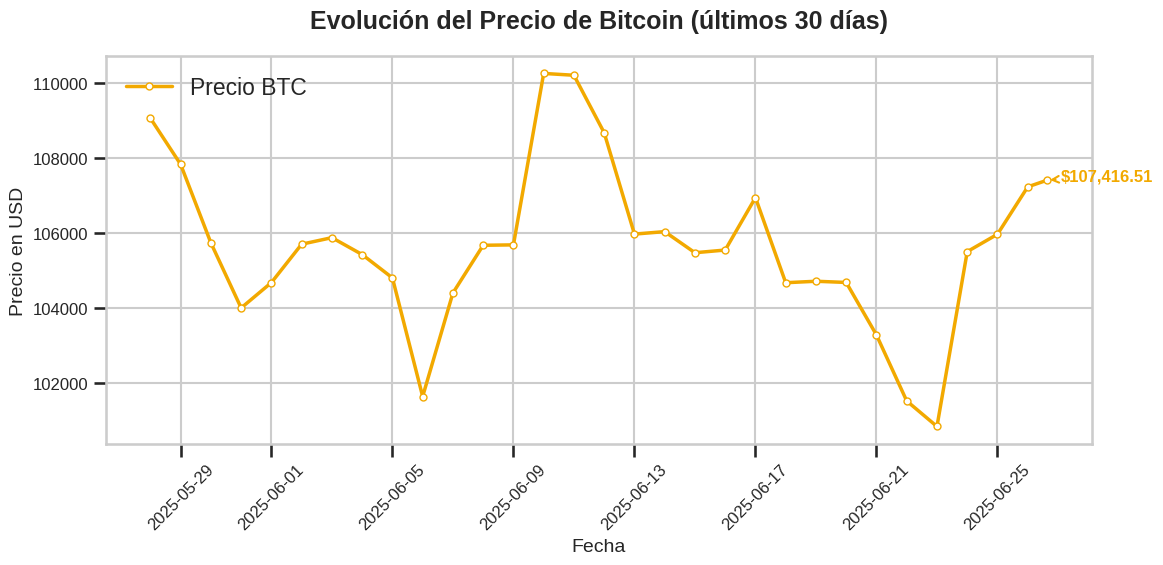

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")  # Tamaño de fuente ideal para presentaciones

# Figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# Línea de precio
ax.plot(df_price["date"], df_price["price"],
        color="#f2a900", linewidth=2.5,
        marker="o", markersize=5, markerfacecolor="white",
        label="Precio BTC")

# Título y etiquetas
ax.set_title("Evolución del Precio de Bitcoin (últimos 30 días)", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("Fecha", fontsize=14)
ax.set_ylabel("Precio en USD", fontsize=14)

# Formato de ticks
plt.xticks(rotation=45)
ax.tick_params(axis='both', labelsize=12)

# Fondo y rejilla ya vienen con el estilo whitegrid

# Anotar el último valor
ultimo_valor = df_price.iloc[-1]
ax.annotate(f"${ultimo_valor['price']:,.2f}",
            xy=(ultimo_valor["date"], ultimo_valor["price"]),
            xytext=(10, 0), textcoords="offset points",
            fontsize=12, color="#f2a900", fontweight="bold",
            arrowprops=dict(arrowstyle="->", color="#f2a900"))

# Leyenda
ax.legend(loc="upper left")

# Layout
plt.tight_layout()
plt.show()


 **Conclusiones**

* El modelo logra una precisión alta (95%) en la clasificación binaria, incluso con un conjunto de características reducido.

* Este tipo de modelo puede ser útil para crear sistemas de alerta temprana o estrategias automatizadas de trading, aunque debe tomarse con cautela debido a la alta volatilidad del mercado cripto.

* La visualización del trayecto de precio complementa muy bien el análisis predictivo, facilitando una interpretación más visual y accesible.